<a href="https://colab.research.google.com/github/juliocr4/Statistical-learning/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
params = np.zeros((1000,2))

In [187]:
for i in range(1000): 
  x = 2 * np.random.rand(100,1)
  y = 4 + 3 * x + np.random.rand(100,1)
  linear_model = LinearRegression()
  linear_model.fit(x,y)
  params[i] = [linear_model.coef_[0,0],linear_model.intercept_]

In [188]:
df = pd.DataFrame({'slope' : params[:,0], 'intercept' : params[:,1]})
df.head(5)

,slope,intercept
0,2.971044,4.519979
1,3.050592,4.429976
2,3.001159,4.508538
3,2.936015,4.579033
4,2.945897,4.557024


El promedio y la desviación estándar de los dos parámetros pendiente e intercepto después de 1000 ajustes es:

In [189]:
print('Promedio: \n', df.mean())
print('\nDesviación estándar: \n', df.std())

Promedio: 
 slope        2.999827
intercept    4.499634
dtype: float64

Desviación estándar: 
 slope        0.049707
intercept    0.057418
dtype: float64


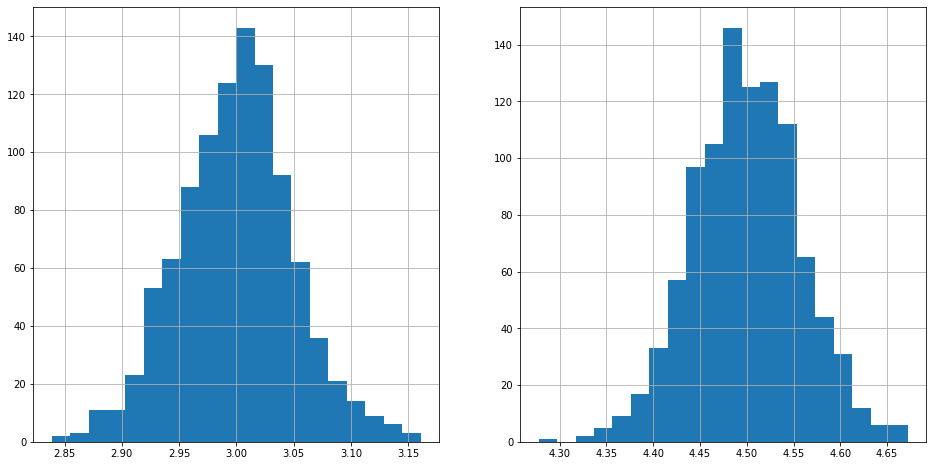

In [190]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
df.slope.hist(bins=20, ax=axs[0], grid=True)
df.intercept.hist(bins=20, ax=axs[1], grid=True)
#plt.savefig(plts+'v203.jpg')

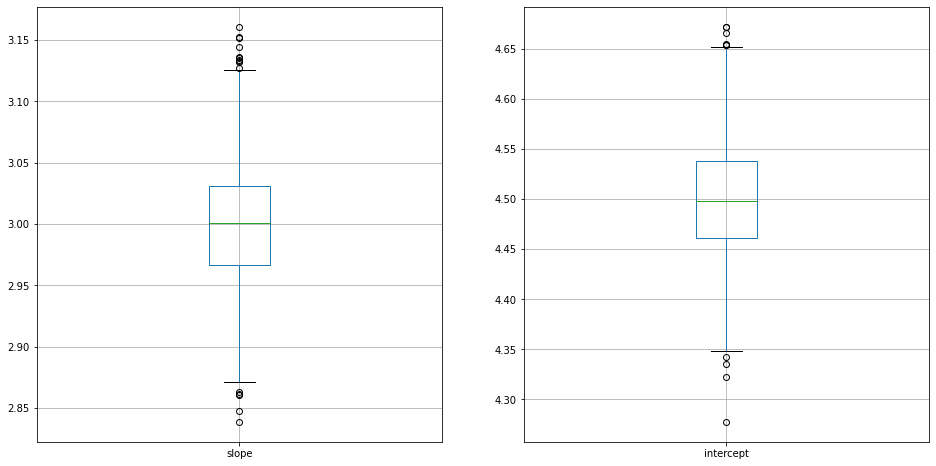

In [191]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
df.boxplot('slope', ax=axs[0], grid=True)
df.boxplot('intercept', ax=axs[1], grid=True)

In [192]:
df.describe()

,slope,intercept
count,1000.000000,1000.000000
mean,2.999827,4.499634
std,0.049707,0.057418
min,2.838736,4.277488
25%,2.966821,4.461144
50%,3.000881,4.497655
75%,3.030632,4.537931
max,3.160726,4.671879


El *np.random.rand* da número aleatorios entre [0,1) con igual probabilidad y por tanto el promedio de una muestra grande se acerca a *0.5*.

$$\overline{[0,1)} \approx 0.5$$

Entonces el promedio de la pendiente es:

$$\overline{6\times[0,1)} = 6 \times \overline{[0,1)} \approx 3$$

 y el promedio del intercepto es
 
 $$\overline{4+[0,1)} = 4+\overline{[0,1)} \approx 4.5$$.

 Lo que concuerda con los dos resultados obtenidos para los valores promedio. Las desviaciones estándar podemos ver que son muy pequeñas respecto a la media
  $(<3\%)$ lo que hace que ambos conjuntos de datos estén poco esparcidos. Podemos ver de ambos histogramas que los datos parecen seguir una distribución gaussiana bastante simétrica ya que la mediana ($50\%$ en el df.describe) está muy cerca de la media.